In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [6]:
img = cv2.imread(path)

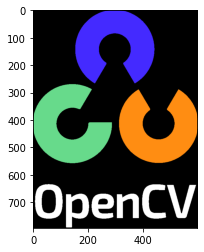

In [7]:
plt.imshow(img)

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

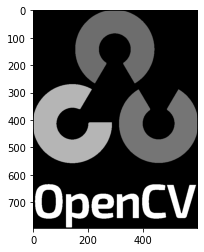

In [9]:
plt.imshow(img_gray, cmap = 'gray')

# We implement above function ourself

In [10]:
img.shape

(794, 600, 3)

# Get R, G, B channels

In [11]:
imgR = img[..., 0] # R
imgG = img[..., 1] # G
imgB =img[..., 2] # B

In [12]:
imgR.shape

(794, 600)

# transform to grayscale

In [13]:
# elementwise multiply
img_gray = np.multiply(imgR,0.299) + np.multiply(imgG,0.587) + np.multiply(imgB,0.114)

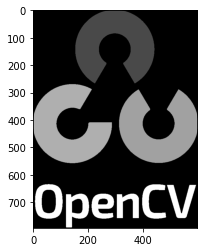

In [14]:
plt.imshow(img_gray, cmap='gray')

# Segmentation Model

In [17]:
!pip install -U segmentation-models

     |████████████████████████████████| 51kB 3.5MB/s 


In [19]:
!pip install tensorflow-gpu==1.15.0

In [8]:
import tensorflow as tf

In [9]:
tf.__version__

'1.15.0'

In [10]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


# Set Model backbone

In [11]:
model = sm.Unet(backbone_name='resnet101', encoder_weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
171171840/171164896 [==============================] - 4s 0us/step


In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

# Test Fit Model

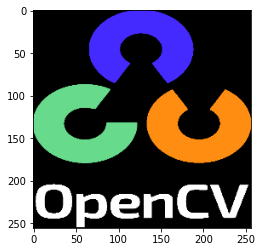

In [ ]:
# image size according to the decoder filter of the model -> (256,128,64,32,16)
x = cv2.resize(img, (256,256))
plt.imshow(x)

In [ ]:
# increase dimmension for batch_size
x = x[np.newaxis, :]
x.shape

(1, 256, 256, 3)

In [ ]:
predict_img = model.predict(x)

In [ ]:
predict_img.shape

(1, 256, 256, 1)

In [ ]:
#overlap the predict img and the origin img
result = predict_img[0] + x[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


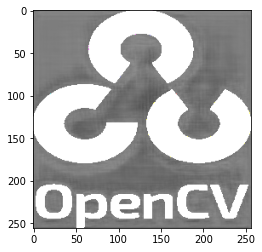

In [ ]:
plt.imshow(result)

In [13]:
import glob

In [14]:
!ls "/content/gdrive/My Drive/iir_training_python/cvHW/f01"

image  label


# Import Training Data

In [15]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/*.png")

In [16]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [17]:
images = [cv2.imread(i) for i in filenames]

In [18]:
# normalize
images = [i/255 for i in images] 

In [19]:
#resize to fit model
images = [cv2.resize(i, (256,256)) for i in images]

In [20]:
images[0].shape

(256, 256, 3)

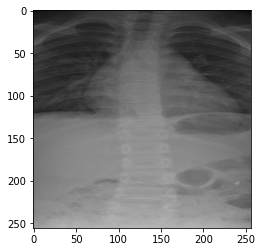

In [21]:
plt.imshow(images[0])

# Import training Labels

In [22]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/*.png")

In [23]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [24]:
labels = [cv2.imread(i) for i in filenames]

In [25]:
labels = [i/255 for i in labels]

In [26]:
labels = [cv2.resize(i,(256,256)) for i in labels]

In [27]:
len(labels)

20

In [28]:
labels[0].shape

(256, 256, 3)

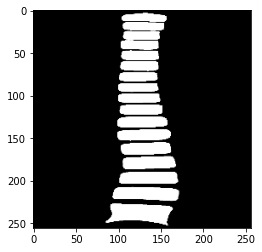

In [29]:
plt.imshow(labels[0])

# Split Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
index_train, index_test = train_test_split(range(20),test_size=0.2, shuffle=True)

In [32]:
index_train

[0, 18, 8, 16, 3, 11, 2, 14, 15, 10, 19, 17, 5, 13, 12, 7]

In [33]:
index_test

[9, 1, 4, 6]

In [34]:
# divide the imgs and labels
x_train = [images[i] for i in index_train]
x_test = [images[i] for i in index_test]
y_train = [labels[i] for i in index_train]
y_test = [labels[i] for i in index_test]

In [35]:
# convert fit data into type numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
y_test.shape

(4, 256, 256, 3)

# Fit model

In [37]:
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:
model.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.2)

Train on 12 samples, validate on 4 samples
Epoch 1/100
12/12 [==============================] - 25s 2s/sample - loss: 1.5830 - iou_score: 0.1660 - val_loss: 15.5369 - val_iou_score: 0.1573
Epoch 2/100
12/12 [==============================] - 1s 61ms/sample - loss: 1.2869 - iou_score: 0.2441 - val_loss: 47.4001 - val_iou_score: 0.1569
Epoch 3/100
12/12 [==============================] - 1s 55ms/sample - loss: 1.1065 - iou_score: 0.3113 - val_loss: 72.6588 - val_iou_score: 0.1568
Epoch 4/100
12/12 [==============================] - 1s 54ms/sample - loss: 0.9920 - iou_score: 0.3625 - val_loss: 137.7852 - val_iou_score: 0.1567
Epoch 5/100
12/12 [==============================] - 1s 55ms/sample - loss: 0.9111 - iou_score: 0.4015 - val_loss: 191.1536 - val_iou_score: 0.1564
Epoch 6/100
12/12 [==============================] - 1s 55ms/sample - loss: 0.8548 - iou_score: 0.4265 - val_loss: 105.0844 - val_iou_score: 0.1562
Epoch 7/100
12/12 [==============================] - 1s 54ms/sample - los

In [39]:
test_img = x_test[0][np.newaxis, :]

In [40]:
test_img.shape

(1, 256, 256, 3)

In [41]:
predict_img = model.predict(test_img)

In [42]:
show_img = predict_img[0] + test_img[0]

In [43]:
show_img.shape

(256, 256, 3)

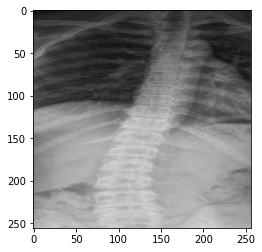

In [44]:
plt.imshow(show_img)

In [ ]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/model"

In [ ]:
model.save(path)